# STEP PROJECT

## EDA. Analysis

Спершу потрібно записати всі осовні імпорти, у тому числі і для пешого етапу - Еди

In [2]:
import sklearn as sk
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # to fill missing data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import logging
import time


import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [3]:
import requests
import seaborn as sns
import pandas as pd
import numpy as np
from io import StringIO

In [4]:
URL = 'https://raw.githubusercontent.com/axew12/kde_/main/IKEA.csv'
req = requests.get(URL)

Далі потрібно створити доступ до вже заздалегідь завантаженого на гітхаб ссв файлу та зробити перевірку на статус код

In [5]:
if req.status_code == 200:
    df = pd.read_csv(StringIO(req.text))
else:
    print(f"Failed to fetch data. Status code: {req.status_code}")

In [31]:
 df.head


<bound method NDFrame.head of       Unnamed: 0   item_id                   name       category   price  \
0              0  90420332               FREKVENS  Bar furniture   265.0   
1              1    368814              NORDVIKEN  Bar furniture   995.0   
2              2   9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0   
3              3  80155205                   STIG  Bar furniture    69.0   
4              4  30180504                NORBERG  Bar furniture   225.0   
...          ...       ...                    ...            ...     ...   
3689        3689  99157902                ELVARLI      Wardrobes   750.0   
3690        3690   9158152                ELVARLI      Wardrobes  1572.0   
3691        3691  59157541                ELVARLI      Wardrobes   924.0   
3692        3692  89157573                ELVARLI      Wardrobes  2745.0   
3693        3693  69157376                ELVARLI      Wardrobes  1231.0   

         old_price  sellable_online  \
0     No old price

In [32]:
df.tail() # 5 last raws

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0
3693,3693,69157376,ELVARLI,Wardrobes,1231.0,"SR 1,535",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0


In [33]:
df.shape # -> shape

(3694, 14)

In [34]:
df.sample(5) # -> 5 randomly selected samples

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
2361,2361,351125,VIMLE,Sofas & armchairs,125.0,No old price,True,https://www.ikea.com/sa/en/p/vimle-cover-for-f...,Yes,Cover for footstool with storage,Ehlén Johansson,NaN,NaN,NaN
2526,2526,20398754,GRÖNLID,Sofas & armchairs,550.0,No old price,True,https://www.ikea.com/sa/en/p/groenlid-cover-fo...,Yes,Cover for 2-seat sofa-bed section,Francis Cayouette,NaN,NaN,NaN
3687,3687,79302995,ELVARLI,Wardrobes,1611.0,"SR 1,815",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
2729,2729,70399020,LUNNARP,Tables & desks,159.0,No old price,True,https://www.ikea.com/sa/en/p/lunnarp-side-tabl...,No,"Side table, 55x45 cm",Johan Kroon,NaN,55.0,45.0
1904,1904,69252712,STUVA / FRITIDS,Nursery furniture,730.0,No old price,True,https://www.ikea.com/sa/en/p/stuva-fritids-che...,Yes,"Chest of 6 drawers, 60x50x128 cm",Ebba Strandmark,50.0,128.0,60.0


In [35]:
df.isnull().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

Вище виведений результат показує кількість пустих значень у кожній колонці. Як бачимо, вони наявні у колонках глибини, висоти та ширини виробів, що становлять 39.6% , 26.7%  та 15.9% віж усіх значень відповідно. На мою думку, буде краще заповнити ці нумерік дані за допомогою медіани значення кожної з колонок, адже розміри виборів можуть надалі впливати на коливання ціни, що є важливим для подальшого аналізу.

In [36]:
req.headers

{'Connection': 'keep-alive', 'Content-Length': '154500', 'Cache-Control': 'max-age=300', 'Content-Security-Policy': "default-src 'none'; style-src 'unsafe-inline'; sandbox", 'Content-Type': 'text/plain; charset=utf-8', 'ETag': 'W/"d901e6fe53bcc43168991cd6d6156d10a1dc274f9088d941dfbe6520d54137fc"', 'Strict-Transport-Security': 'max-age=31536000', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'deny', 'X-XSS-Protection': '1; mode=block', 'X-GitHub-Request-Id': '21F8:533C:78B96D:91BAD2:65A69B8D', 'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Date': 'Tue, 16 Jan 2024 15:06:55 GMT', 'Via': '1.1 varnish', 'X-Served-By': 'cache-chi-kigq8000089-CHI', 'X-Cache': 'MISS', 'X-Cache-Hits': '0', 'X-Timer': 'S1705417615.806495,VS0,VE278', 'Vary': 'Authorization,Accept-Encoding,Origin', 'Access-Control-Allow-Origin': '*', 'Cross-Origin-Resource-Policy': 'cross-origin', 'X-Fastly-Request-ID': '053773f29246208ef9107d9f1731bd7770e02ff1', 'Expires': 'Tue, 16 Jan 2024 15:11:55 GMT', 'Sour

In [37]:
df

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0


Далі я вважаю за потрібне проаналізувати колонки та визначитись, які потрібні. Створивши копію дата фрейму, я хотіла б залишити лише такі колонки: 'name', 'category', 'price', 'sellable_online', 'other_colors', 'depth', 'height', 'width', адже саме вони, на мою думку, можуть мати вплив на аналіз даних.

In [6]:
ikea_df = df.drop(['item_id','Unnamed: 0', 'link', 'old_price', 'short_description'], axis= 1) #1- deleting columns, 0 - raws
ikea_df.columns

Index(['name', 'category', 'price', 'sellable_online', 'other_colors',
       'designer', 'depth', 'height', 'width'],
      dtype='object')

In [38]:
ikea_df.shape

(3694, 20)

In [39]:
ikea_df = ikea_df.copy()
ikea_df.dropna(inplace = True )

In [40]:
ikea_df.shape

(1899, 20)

Після виділення зайвих колонок та пустих значень, ми отримали майже вдвічі мерший дата врейм. Тепер можна візуалізувати його, аби побачити залежності між змінними.

In [42]:
# SKALING
from sklearn.preprocessing import MinMaxScaler, StandardScaler
selected_features = ikea_df[['price']]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(selected_features)
print(scaled_features[:10])

[[0.00657689]
 [0.02286251]
 [0.03538992]
 [0.01284059]
 [0.01284059]
 [0.01492849]
 [0.04060967]
 [0.04060967]
 [0.01785155]
 [0.03538992]]


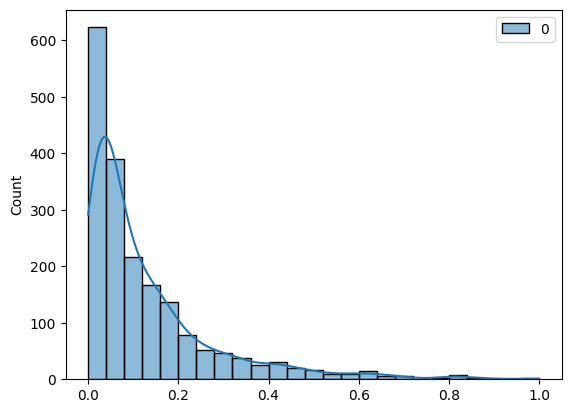

In [43]:
sns.histplot(scaled_features, kde= True, bins = 25);

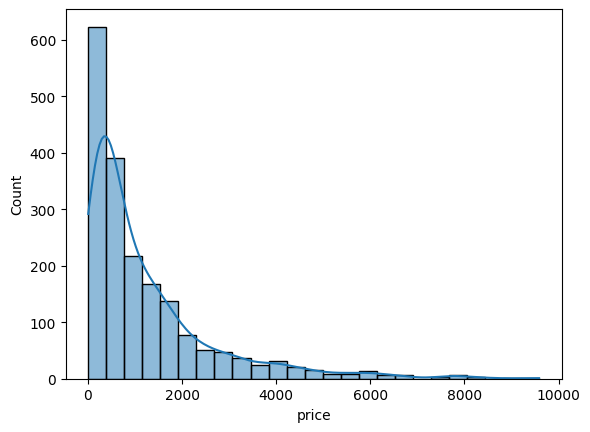

In [44]:
sns.histplot(ikea_df['price'], kde= True, bins = 25);

In [45]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

ikea_df['price'] = pd.to_numeric(ikea_df['price'])
scaler = StandardScaler()
scaled_features_standard = scaler.fit_transform(ikea_df['price'].values.reshape(-1, 1))
print(scaled_features_standard[:10])


[[-0.81002694]
 [-0.70030026]
 [-0.61589512]
 [-0.76782437]
 [-0.76782437]
 [-0.75375685]
 [-0.58072631]
 [-0.58072631]
 [-0.73406232]
 [-0.61589512]]


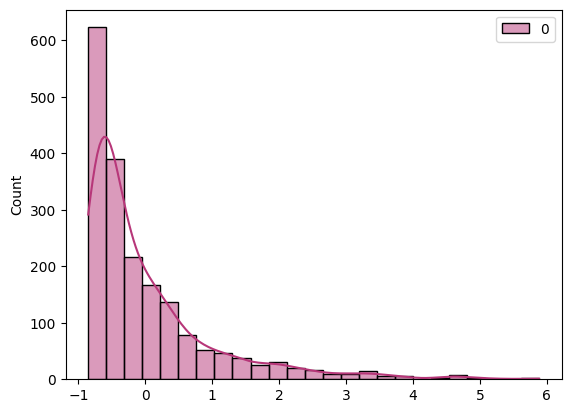

In [46]:
sns.histplot(scaled_features_standard, kde= True, bins = 25, palette='magma');

Також під час роботи виникло припущення щодо важливості масштабування. Питанням, яке ми хотіли дослідити було, чи спростить цей процес аналіз даних по колонці ціна. Як бачимо, результат залишився незмінним, що спростовує гіпотезу. Для того, аби зробити стандартне масштабуванндля фітчу прайс, ми перевели колонку з одновимірного у двовимірний вигляд за допомогою рішейпу. <br>
Також можна перевірити це ж питання на колонці одного із параметрів виробів. Я оберу висоту

In [47]:
# SKALING
from sklearn.preprocessing import MinMaxScaler, StandardScaler
selected_features = ikea_df[['height']]
scaler = MinMaxScaler()
scaled_features_h = scaler.fit_transform(selected_features)
print(scaled_features[:10])

[[0.00657689]
 [0.02286251]
 [0.03538992]
 [0.01284059]
 [0.01284059]
 [0.01492849]
 [0.04060967]
 [0.04060967]
 [0.01785155]
 [0.03538992]]


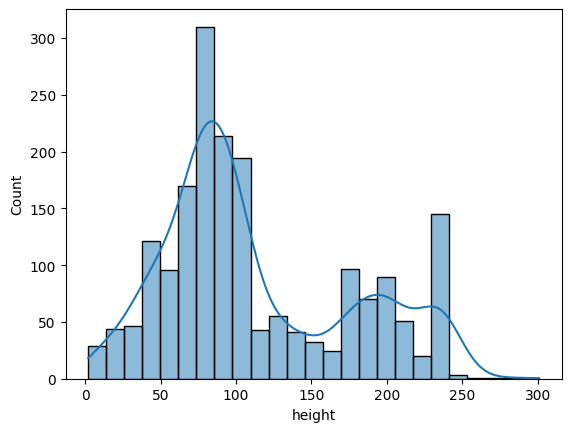

In [48]:
sns.histplot(ikea_df['height'], kde= True, bins = 25);


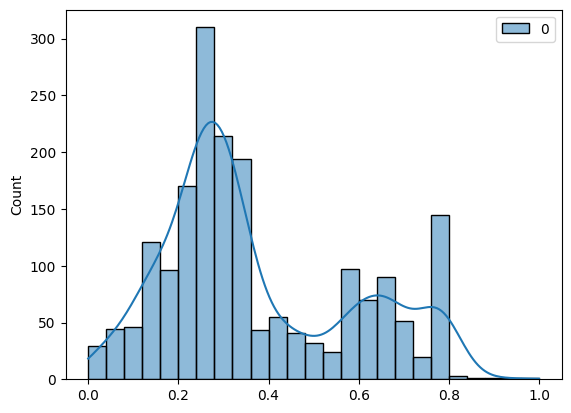

In [49]:
sns.histplot(scaled_features_h, kde= True, bins = 25);

Як бачимо, гіпотеза теж спростовується.<br>
Далі мало б сенс вивести теплову карту, яка б дозволила проаналізувати кореляцію одразу багатьох змінних. Найбільше нас цікавлять розміри та ціна обʼєктів.

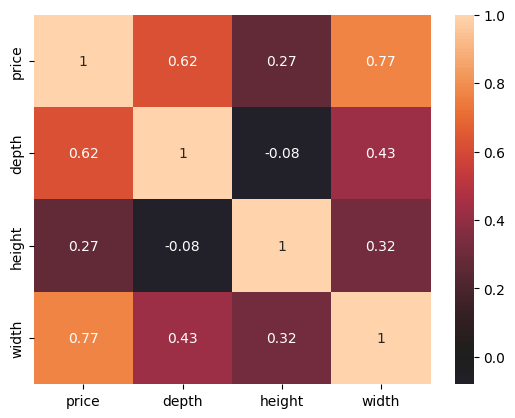

In [50]:
sns.heatmap(ikea_df[['price', 'depth', 'height', 'width']].corr(), xticklabels= df[['price', 'depth', 'height', 'width']].corr().columns,
            yticklabels= ikea_df[['price', 'depth', 'height', 'width']].corr().columns, center= 0, annot= True);

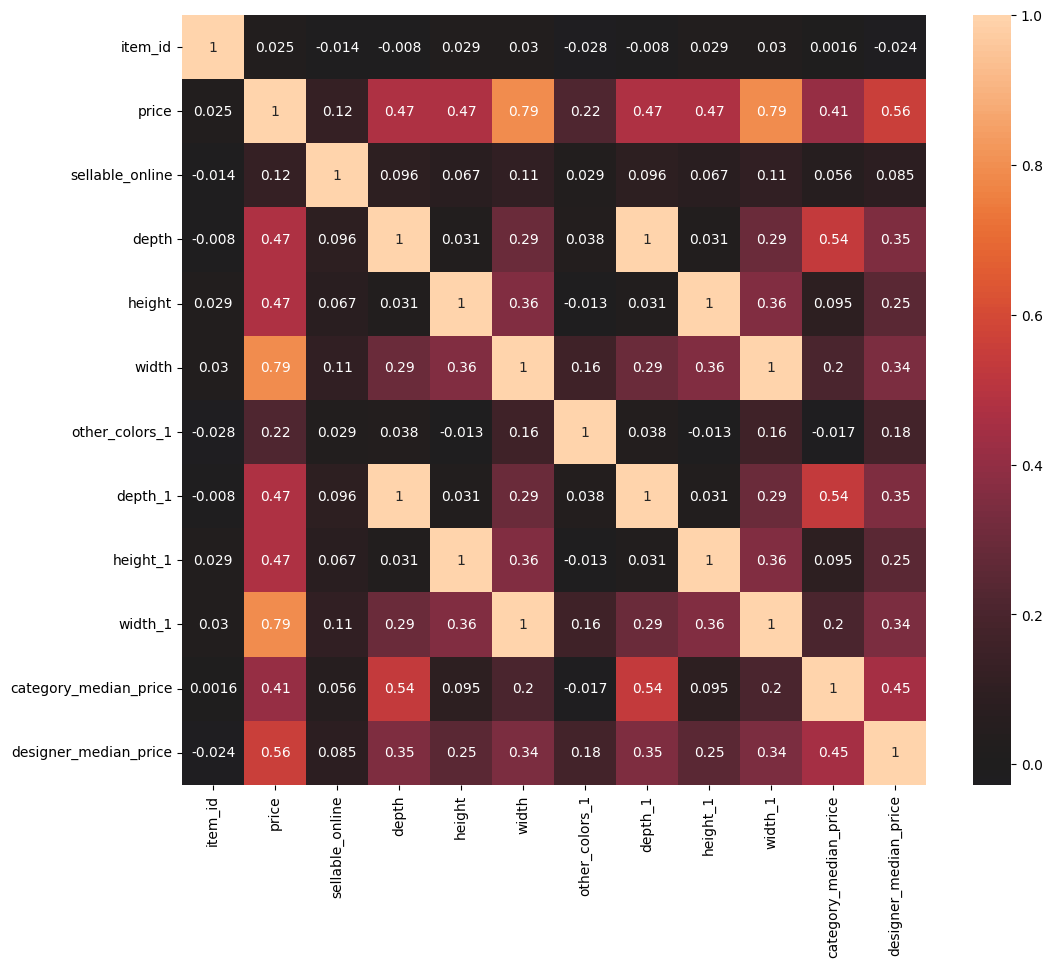

In [55]:
plt.subplots(figsize = (12,10))
sns.heatmap(ikea_df.corr(method= 'spearman'), xticklabels= ikea_df.corr().columns,
            yticklabels= ikea_df.corr().columns, center= 0, annot= True)
plt.show()

Найкращу кореляцію бачимо між зміними ціни та ширини (77%) -> що дає можливість припускати, що найбільше ціна залежить від ширини виробу. Також непоганий рівень кореляції між ціною та глибиною виробів (62%). Тобто можна припустити, що розміри виробів усе ж впливають на ціну.<br>
Теплова карта Спермана дає більш чіткі цифри для аналізу, хоч трохи змінюючи результат. Топ дві кореляції залишаються незмінними, проте їхній рівень та різниця між ними дещо змінюється: ціна * ширина (79%) та ціна * глибина (47%). Також додається ще одна кореляція між ціною та глибиною (47%), що ще більше підтверджує гіпотезу того, що ціна все ж залежить від розмірів

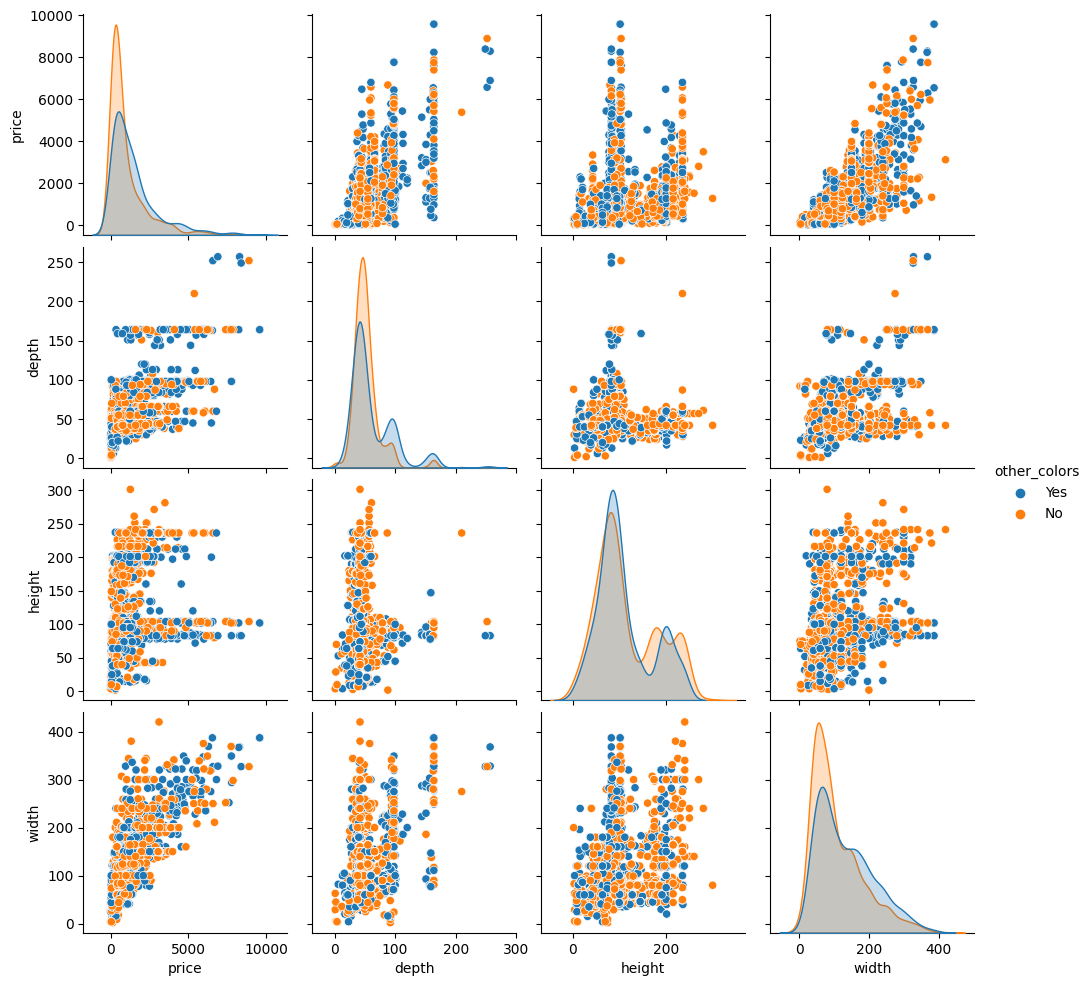

In [52]:
sns.pairplot(ikea_df[[ 'price', 'depth', 'height', 'width', 'other_colors', 'category']], hue = 'other_colors')

<Axes: xlabel='other_colors', ylabel='price'>

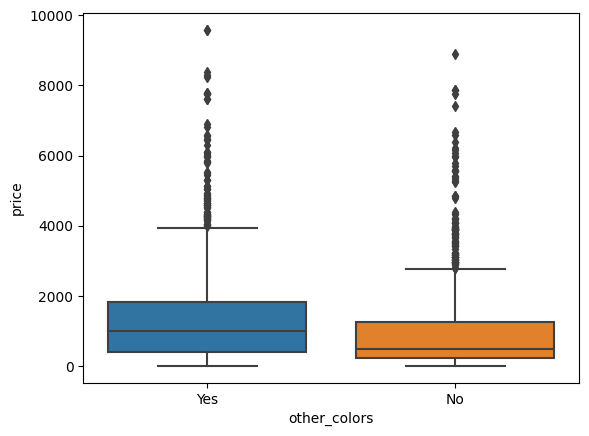

In [53]:
sns.boxplot(data=ikea_df, x='other_colors', y='price')

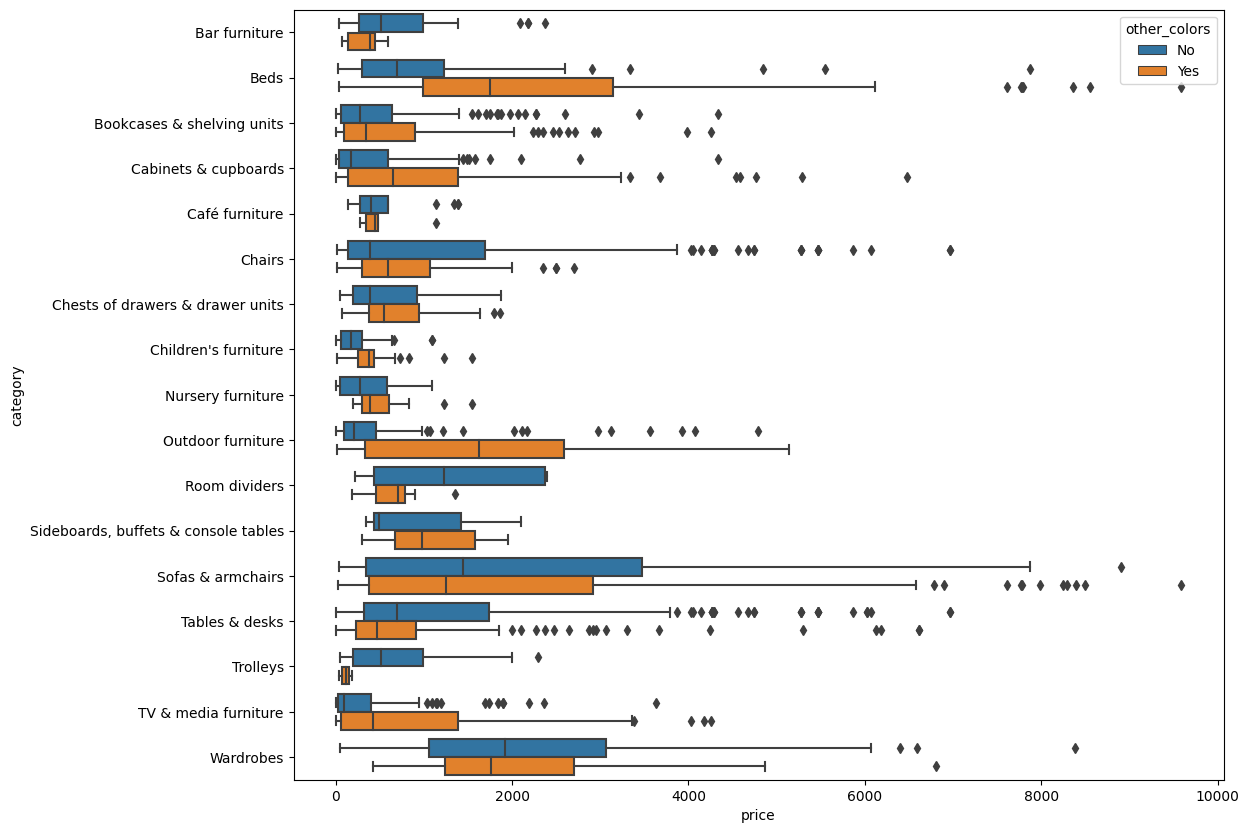

In [54]:
plt.subplots(figsize = (12,10))
sns.boxplot(data = df, x = 'price', y = 'category', hue = 'other_colors')
plt.show()

Проаналізувавши боксплот вище, ми бачимо, що часто в категорії вироби без кольорів коштують більше від інших, проте у тих, які мають палітру кольорів, є багато аутлаєрів, через що середня вартість може бути спотвореною чи зміненою.

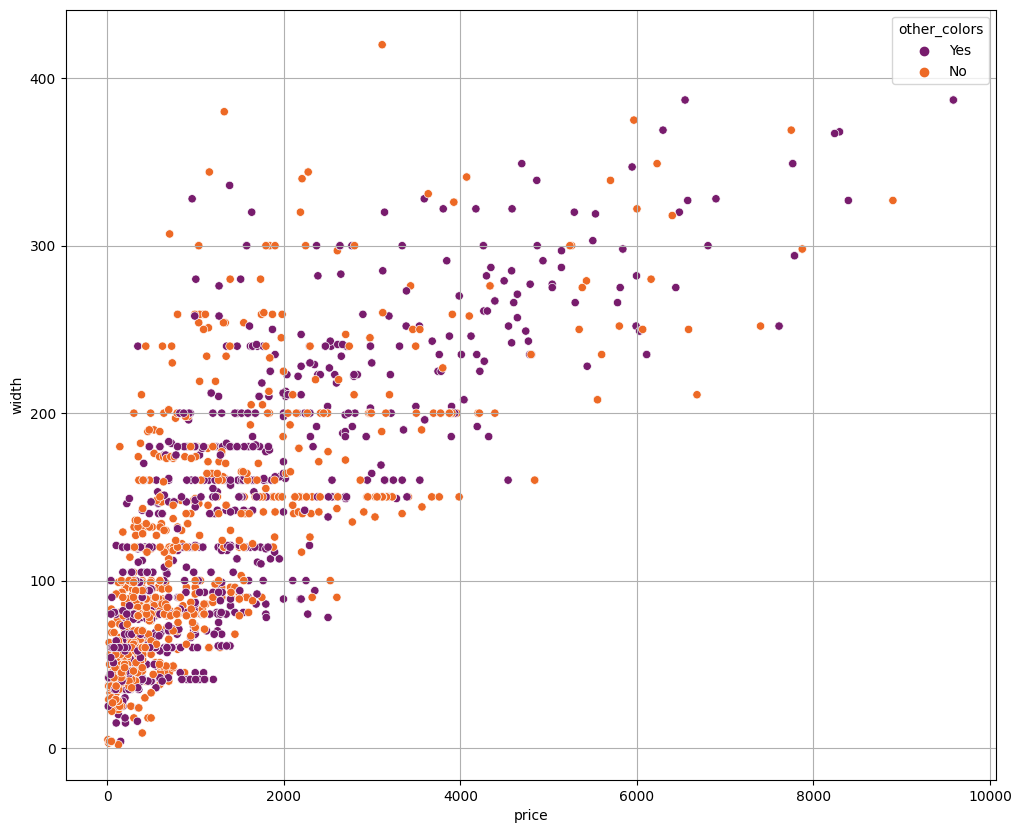

In [56]:
plt.subplots(figsize = (12,10))
sns.scatterplot(x = 'price', y = 'width', data = ikea_df, hue = 'other_colors', palette='inferno');
plt.grid()

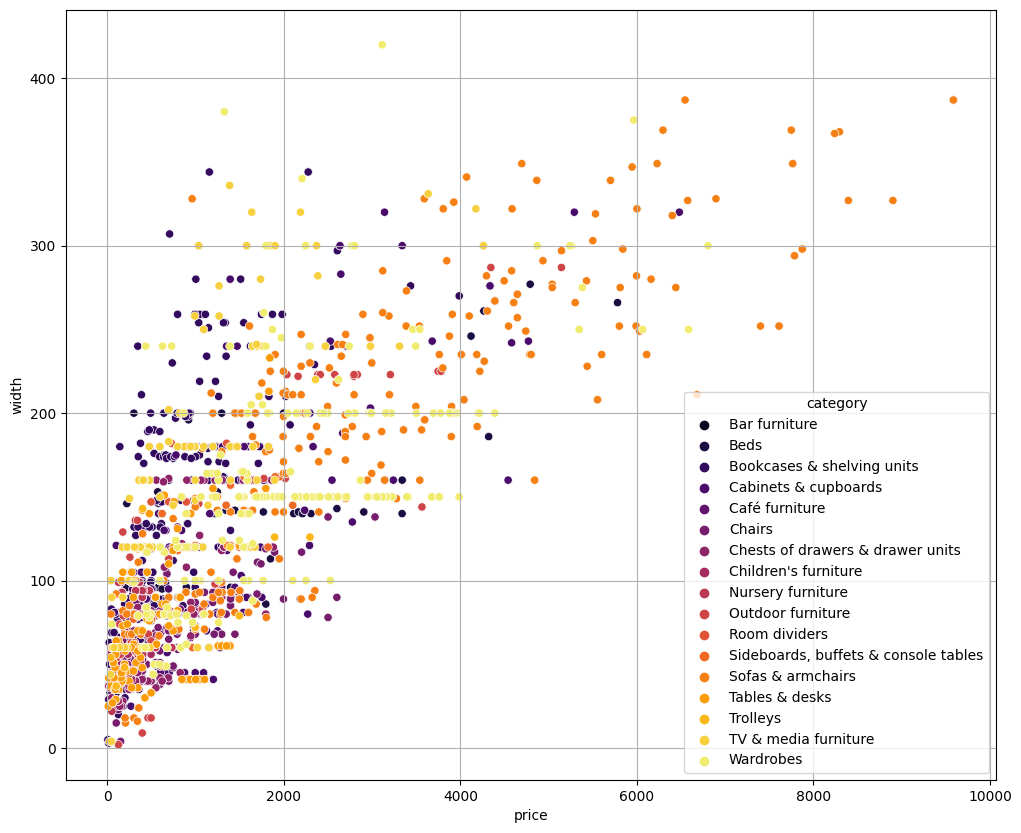

In [57]:
plt.subplots(figsize = (12,10))
sns.scatterplot(x = 'price', y = 'width', data = ikea_df, hue = 'category', palette='inferno');
plt.grid()

Метою побудови графіків вище було визначити,чи є звʼязок між ціною та наявністю інших кольорів виробу. Ми бачимо, що загалом виробів із лише одним кольором менше, аніж із багатьма. Проте боксплот та скетерплот показали, що ціна виробів із палітрою кольорів дещо вища, хоч різниця і не суттєва. Також у скетерплотах на осі у я зобразила ширину - найбільш корельовану із ціною змінну, й можна припустити, що зі збільшенням ширини , а тобто і розмірів , ціна підвищувалась. На останньому графіку я вирішила зобразити той самий скетерплот, розбивши кольори за категоріями, але якоїсь супер чіткої картини я не побачила. Найдорожчими вивявились дивани й крісла, які також є одними із найбільших за  шириною виробами.

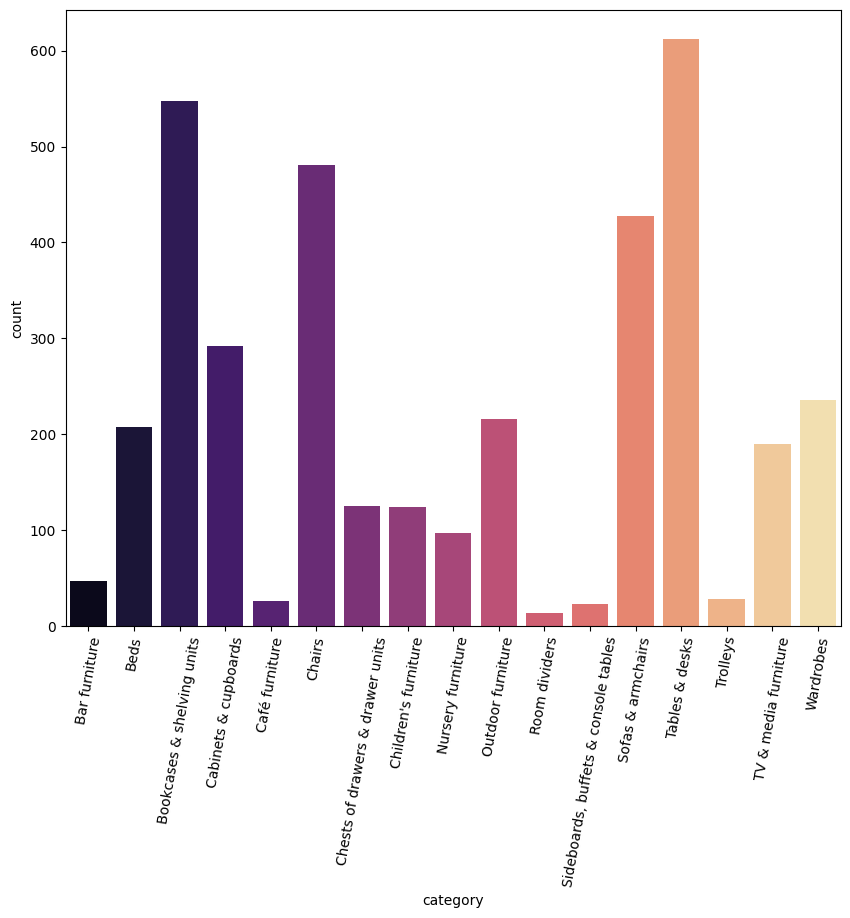

In [58]:
plt.subplots(figsize = (10,8))
sns.countplot( palette='magma', x = df['category']).set_xticklabels(df['category'].unique(), rotation = 80)
plt.show()

## Machine Learning

Першим кроком можна перевірити точність наших моделей.

In [7]:
ikea_df['designer'].head(15)

0     Nicholai Wiig Hansen
1        Francis Cayouette
2        Francis Cayouette
3            Henrik Preutz
4           Marcus Arvonen
5             Carina Bengs
6      K Hagberg/M Hagberg
7              Sarah Fager
8      K Hagberg/M Hagberg
9          Ehlén Johansson
10     K Hagberg/M Hagberg
11            Carina Bengs
12           Nike Karlsson
13    Nicholai Wiig Hansen
14         Ehlén Johansson
Name: designer, dtype: object

In [8]:
# Create function to clear Designers
def cleanDesigners(value, removeIKEA=False, emptyValue=np.nan):
    if not isinstance(value, str):
        return value

    if len(value)>0 and value[0].isdigit():
        return emptyValue

    designers = value.split("/")

    if removeIKEA:
        try:
            designers.remove("IKEA of Sweden")
        except:
            pass
    if len(designers) > 0:
        return '/'.join(sorted(designers))
    else:
        return emptyValue

Чистимо дані, аби легше й швидше було їх обробляти та аналізувати

In [9]:
ikea_df = pd.read_csv("https://raw.githubusercontent.com/axew12/kde_/main/IKEA.csv", index_col= 0).drop_duplicates()

ikea_df['designer_clean'] = df['designer'].apply(cleanDesigners, args= (False, "IKEA of Sweden"))

In [10]:
ikea_df['designer_clean'].head()

0    Nicholai Wiig Hansen
1       Francis Cayouette
2       Francis Cayouette
3           Henrik Preutz
4          Marcus Arvonen
Name: designer_clean, dtype: object

In [11]:
X = ikea_df[['depth', 'width', 'height', 'category', 'designer_clean', 'other_colors']]
Y = ikea_df['price']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])


categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth', 'width', 'height']),
    ('categorical', categorical_transf, ['category', 'designer_clean', 'other_colors'])
])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))
])

dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)
# Use different metric for out model
print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))

R^2 : 0.74147
MAE : 396.26201
MSE : 705.91036


Створюємо пайплайн та виводимо певні метрики задля перевірки якості моделі. Бачимо, що відпрацьовує не дуже добре, оскільки МАЕ та МСЕ мають досить великі значення, коли в ідеалі мають бути наближеними до 0

In [69]:
X = ikea_df[['depth', 'width', 'height', 'category', 'designer_clean', 'other_colors']]
Y = ikea_df['price']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.12, random_state=42)

numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])


categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth', 'width', 'height']),
    ('categorical', categorical_transf, ['category', 'designer_clean', 'other_colors'])
])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))
])

dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)
# Use different metric for out model
print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))

R^2 : 0.82706
MAE : 379.15724
MSE : 639.16783


Спробувавши змінити обʼєми тестових даних, найркащим показником стало 12%, оскільки воно показує найбільше R^2 та найменші МАЕ та МСЕ показники.


In [12]:
X_train.shape, X_test.shape

((2955, 6), (739, 6))

In [13]:

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [14]:
import logging
import time
logging.basicConfig(filename = 'machine_learning_traning.log', filemode= 'w', level= logging.INFO, format= '%(asctime)s - %(levelname)s - %(message)s')

In [15]:
def start_pipeline(pipeline, X_train, Y_train, X_test, Y_test) -> None:
    start_time = time.time()
    logging.info('Start model traning')
    pipeline.fit(X_train, Y_train)
    dtr_predict = pipeline.predict(X_test)
    logging.info(f'Model: {pipeline} Accuracy: {str(pipeline.score(X_test, Y_test))}' )

In [16]:
start_pipeline(dtr, X_train, Y_train, X_test, Y_test)

In [17]:
dtr

Pipeline(steps=[('col_prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['depth', 'width', 'height']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['category', 'designer_clean',
                                                   'other_colors'])])),
                ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))])

In [18]:
# Fill in data
ikea_df['other_colors_1'] = ikea_df['other_colors'].map(dict(Yes=1, No=0))

median_d = ikea_df.groupby(['category'])['depth'].median()
median_h = ikea_df.groupby(['category'])['height'].median()
median_w = ikea_df.groupby(['category'])['width'].median()

median_price = ikea_df.groupby(['category'])['price'].median()
median_dsgn =  ikea_df.groupby(['designer_clean'])['price'].median()

ikea_df = ikea_df.set_index(['category'])
ikea_df['depth_1'] = ikea_df['depth'].fillna(median_d)
ikea_df['height_1'] = ikea_df['height'].fillna(median_h)
ikea_df['width_1'] = ikea_df['width'].fillna(median_w)
ikea_df['category_median_price'] = median_price

ikea_df = ikea_df.reset_index()

ikea_df = ikea_df.set_index(['designer_clean'])
ikea_df['designer_median_price'] = median_dsgn
ikea_df = ikea_df.reset_index()
ikea_df.head()

,designer_clean,category,item_id,name,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,other_colors_1,depth_1,height_1,width_1,category_median_price,designer_median_price
0,Nicholai Wiig Hansen,Bar furniture,90420332,FREKVENS,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,0,47.0,99.0,51.0,445.0,265.0
1,Francis Cayouette,Bar furniture,368814,NORDVIKEN,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,0,47.0,105.0,80.0,445.0,458.0
2,Francis Cayouette,Bar furniture,9333523,NORDVIKEN / NORDVIKEN,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,0,47.0,102.0,48.0,445.0,458.0
3,Henrik Preutz,Bar furniture,80155205,STIG,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,1,50.0,100.0,60.0,445.0,495.0
4,Marcus Arvonen,Bar furniture,30180504,NORBERG,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,0,60.0,43.0,74.0,445.0,150.0


In [70]:
# Function to choose BestRegressor
# Step by step fit data for different model, and display result
def getBestRegressor (X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]

    TestModels = pd.DataFrame()
    res = {}
    tmp = {}

    for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(X_train, Y_train)
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))

        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])])

    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res


In [20]:
X1 = ikea_df[['width_1','depth_1','height_1']]
Y1 = ikea_df['price']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.73798,378.38202,710.65503
GradientBoostingRegressor,0.68623,468.80575,777.68650
DecisionTreeRegressor,0.66186,444.32348,807.31160
KNeighborsRegressor,0.64545,489.29287,826.67028
LinearRegression,0.40125,670.61205,1074.28260
RidgeCV,0.40125,670.61209,1074.28264
LassoCV,0.40117,670.70663,1074.34987
SVR,0.35166,641.01016,1117.88731


Бачимо, що Рендом Форест Регресор є найкращим алгоритмом машинного навчання для наших даних

In [21]:
numik = ikea_df[['depth_1', 'width_1', 'height_1','price']]
numik.head

<bound method NDFrame.head of       depth_1  width_1  height_1   price
0        47.0     51.0      99.0   265.0
1        47.0     80.0     105.0   995.0
2        47.0     48.0     102.0  2095.0
3        50.0     60.0     100.0    69.0
4        60.0     74.0      43.0   225.0
...       ...      ...       ...     ...
3689     50.0     91.0     236.0   750.0
3690     50.0    135.0     236.0  1572.0
3691     50.0    175.0     236.0   924.0
3692     50.0    178.0     236.0  2745.0
3693     50.0    175.0     236.0  1231.0

[3694 rows x 4 columns]>

In [71]:
X = ikea_df[['depth_1', 'width_1', 'height_1']]
Y = ikea_df['price']
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(X, Y, test_size=0.12, random_state=42)

numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])




col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth_1', 'width_1', 'height_1'])

])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))
])

dtr.fit(x_train, y_train)
#dtr_predict = dtr1.predict(x_test)
# Use different metric for out model
print('R^2 : {:.5f}'.format(dtr.score(x_test, y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, y_test))))

R^2 : 0.78707
MAE : 379.15724
MSE : 639.16783


In [23]:
def float_to_int(float_list):
    int_list = []
    for float_num in float_list:
        int_num = round(float_num)
        int_list.append(int_num)
    return int_list

Перевторюємо за допомогою функції флоат в інтеджер, аби могти залучити їх в DecisionTreeClassifier, який вимагає формату інтеджер

In [72]:
y_test_int = float_to_int(y_test)
y_train_int = float_to_int(y_train)

In [73]:
tree = DecisionTreeClassifier(max_depth = 5, random_state = 0)
tree.fit(x_train, y_train_int )
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(x_train, y_train_int )))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(x_test, y_test_int)))

Правильность на обучающем наборе: 0.096
Правильность на тестовом наборе: 0.035


In [74]:
dt_param_grid = {'max_depth': [2,3, 4, 5, 7, None]}
knn_param_grid = {'n_neighbors': [i for i in range(1, 16)]}

dt_gs = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5)
knn_gs = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)


dt_gs.fit(x_train, y_train_int)
knn_gs.fit(x_train, y_train_int)

print(f"Decision Tree: best parameters {dt_gs.best_params_}, best score {dt_gs.best_score_}")
print(f"KNN: best parameters {knn_gs.best_params_}, best score {knn_gs.best_score_}")

Decision Tree: best parameters {'max_depth': None}, best score 0.2620967021181518
KNN: best parameters {'n_neighbors': 1}, best score 0.2758620073286263


Найкращі показники для алгоритмів Decision Tree та KNN